<a href="https://colab.research.google.com/github/maleckainez/basics-of-mlp/blob/main/finished-mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Imports


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score as crs
from sklearn.metrics import balanced_accuracy_score, make_scorer

scr_bal = make_scorer(balanced_accuracy_score)

---
# Dataset
Load and normalise dataset.

In [46]:
data_frame = pd.read_csv("data.csv")
data_frame = data_frame.drop("id", axis=1)
data_frame = data_frame.fillna(0)

Translate diagnosis values to binary vector


In [47]:
data_frame["diagnosis"] = data_frame["diagnosis"].map({"M": 0, "B": 1})
diagnosis = data_frame["diagnosis"].to_numpy()

Translate all values to floats in binary range


In [48]:
data_frame = data_frame.drop("diagnosis", axis=1)
scaler = MinMaxScaler()
bin_data = scaler.fit_transform(data_frame)

---
# Model creation and training


In [49]:
hidden_layers_sizes = [(30,),(30, 30), (60, ), (60,60), (100, ), (69,42), (99,1)]
scores = {}
for layer in hidden_layers_sizes:
  perceptor = MLPClassifier(hidden_layer_sizes=layer, max_iter=1000)
  score = crs(perceptor, bin_data, diagnosis, scoring=scr_bal).mean()
  scores[layer] = score
  print("Layer %s, score precision: %2.2f" %(str(layer), 100*score))

Layer (30,), score precission: 97.18
Layer (30, 30), score precission: 97.28
Layer (60,), score precission: 97.32
Layer (60, 60), score precission: 96.93
Layer (100,), score precission: 97.41
Layer (69, 42), score precission: 97.14


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Layer (99, 1), score precission: 78.40


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Get the best score giving hidden layer config

In [50]:
best_layer_config = max(scores, key=scores.get)
print(f"Best hidden layer config: {best_layer_config}")

Best hidden layer config: (100,)


# Test activators


In [51]:
activators = {'identity', 'logistic', 'tanh', 'relu'}
activator_scores = {}

for a in activators:
  perceptor = MLPClassifier(hidden_layer_sizes=best_layer_config, max_iter=1000, activation=a)
  score = crs(perceptor, bin_data, diagnosis, scoring=scr_bal).mean()
  activator_scores[a] = score
  print("Activator %s score precision: %2.2f" %(str(a), 100*score))

Activator relu score precission: 97.41
Activator identity score precission: 97.31
Activator logistic score precission: 97.09
Activator tanh score precission: 97.55


Get the best activator

In [52]:
best_activator = max(activator_scores, key=activator_scores.get)
print(f"Best activator: {best_activator}")

Best activator: tanh


# Test solvers


In [55]:
solvers = ['lbfgs','sgd', 'adam']
solver_scores = {}

for s in solvers:
  perceptor = MLPClassifier(
      hidden_layer_sizes=best_layer_config,
      activation= best_activator,
      solver=s,
      max_iter=1000)
  score = crs(perceptor, bin_data, diagnosis, scoring=scr_bal).mean()
  solver_scores[s] = score
  print("Solver %s score precision: %2.2f" %(str(s), 100*score))

Solver lbfgs score precision: 95.86
Solver sgd score precision: 94.27
Solver adam score precision: 97.17


# Generate plots

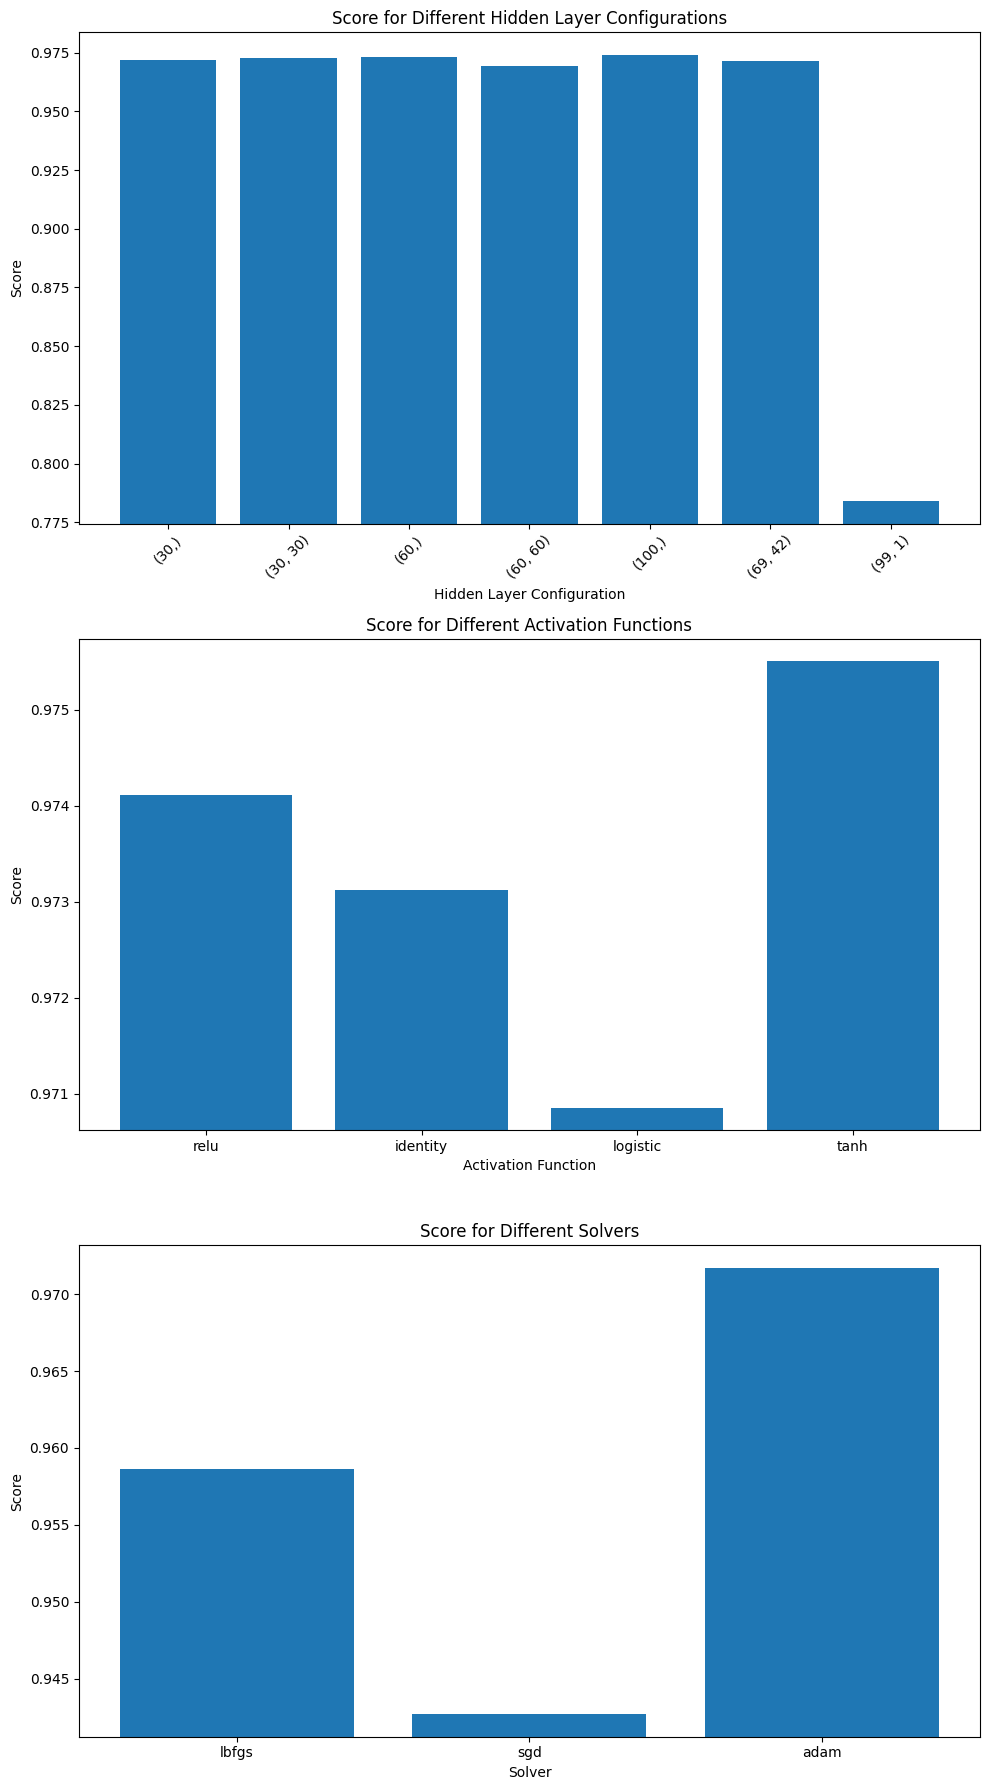

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate dynamic y-axis limits
def calculate_ylim(values):
    min_val = np.min(values)
    max_val = np.max(values)
    value_range = max_val - min_val

    # Add a 5% margin, ensuring limits stay between 0 and 1
    ymin = max(0.0, min_val - value_range * 0.05)
    ymax = min(1.0, max_val + value_range * 0.05)

    # If range is too small, provide a default small margin around mean
    if value_range < 0.001:
        mean_val = np.mean(values)
        ymin = max(0.0, mean_val - 0.005)
        ymax = min(1.0, mean_val + 0.005)

    return ymin, ymax

# Hidden layers plot data
hidden_layer_labels = [str(layer) for layer in scores.keys()]
hidden_layer_values = list(scores.values())
hidden_layer_ymin, hidden_layer_ymax = calculate_ylim(hidden_layer_values)

# Activators plot data
activator_labels = list(activator_scores.keys())
activator_values = list(activator_scores.values())
activator_ymin, activator_ymax = calculate_ylim(activator_values)

# Solvers plot data
solver_labels = list(solver_scores.keys())
solver_values = list(solver_scores.values())
solver_ymin, solver_ymax = calculate_ylim(solver_values)

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Hidden layer subplot
axes[0].bar(hidden_layer_labels, hidden_layer_values)
axes[0].set_title('Score for Different Hidden Layer Configurations')
axes[0].set_xlabel('Hidden Layer Configuration')
axes[0].set_ylabel('Score')
axes[0].set_ylim(hidden_layer_ymin, hidden_layer_ymax)
axes[0].tick_params(axis='x', rotation=45) # Rotate labels for readability

# Plot for Activators
axes[1].bar(activator_labels, activator_values)
axes[1].set_title('Score for Different Activation Functions')
axes[1].set_xlabel('Activation Function')
axes[1].set_ylabel('Score')
axes[1].set_ylim(activator_ymin, activator_ymax)

# Plot for Solvers
axes[2].bar(solver_labels, solver_values)
axes[2].set_title('Score for Different Solvers')
axes[2].set_xlabel('Solver')
axes[2].set_ylabel('Score')
axes[2].set_ylim(solver_ymin, solver_ymax)

plt.tight_layout()
plt.show()